***
# Multiple linear regression 多元線性回歸

> ## $y=\alpha+\beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$ <br>
> ## $\mathbf{Y} = \mathbf{X}\beta$<br>
>$
\begin{bmatrix}
    Y_1 \\ Y_2\\ \vdots \\ Y_m
\end{bmatrix} = 
\begin{bmatrix}
    1 & X_{11} & \cdots & X_{1n} \\ 1 & X_{21} & \cdots & X_{2n}\\ \vdots & \vdots & \vdots & \vdots\\ 1 & X_{m1} & \cdots & X_{mn}
\end{bmatrix} \times
\begin{bmatrix}
   \alpha \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_n
\end{bmatrix}
 $
 
## How to find $\beta$?

> ## $\beta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \mathbf{Y}$

---
## For example

$
\begin{bmatrix}
    7 \\ 9\\ 13\\ 17.5\\ 18
\end{bmatrix} = 
\begin{bmatrix}
    1 & 6 & 2 \\ 1 & 8 & 1\\ 1 & 10 & 0\\ 1 & 14 & 2\\ 1 & 18 & 0
\end{bmatrix} \times
\begin{bmatrix}
   \alpha \\ \beta_1 \\ \beta_2
\end{bmatrix}
 $

In [12]:
from numpy.linalg import inv
from numpy import dot, transpose

X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(dot(inv(dot(transpose(X), X)), dot(transpose(X), y)))

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [9]:
from numpy.linalg import lstsq

X = [[1, 6, 2], [1, 8, 1], [1, 10, 0], [1, 14, 2], [1, 18, 0]]
y = [[7], [9], [13], [17.5], [18]]
print(lstsq(X, y, rcond=None)[0])

[[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [14]:
from sklearn.linear_model import LinearRegression

X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y_test = [[11], [8.5], [15], [18], [11]]
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predicted: %s, Target: %s' % (prediction, y_test[i]))
    print('R-squared: %.2f' % model.score(X_test, y_test))

Predicted: [10.0625], Target: [11]
R-squared: 0.77
Predicted: [10.28125], Target: [8.5]
R-squared: 0.77
Predicted: [13.09375], Target: [15]
R-squared: 0.77
Predicted: [18.14583333], Target: [18]
R-squared: 0.77
Predicted: [13.3125], Target: [11]
R-squared: 0.77


# Polynomial regression 多項式回歸
> ## Quadratic regression 二次回歸
>> ## $y=\alpha + \beta_1 x + \beta_2 x^2$

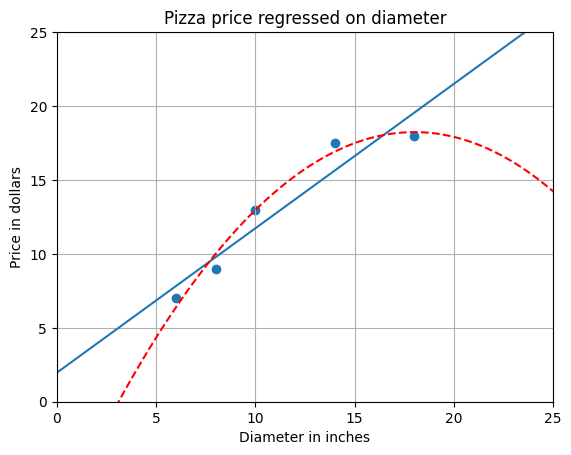

[[6], [8], [10], [14], [18]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  10. 100.]
 [  1.  14. 196.]
 [  1.  18. 324.]]
[[6], [8], [11], [16]]
[[  1.   6.  36.]
 [  1.   8.  64.]
 [  1.  11. 121.]
 [  1.  16. 256.]]
Simple linear regression r-squared 0.809726797707665
Quadratic regression r-squared 0.8675443656345073


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)
quadratic_featurizer = PolynomialFeatures(degree=2) # you can try degree = 3, 4 or 9
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r', linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()
print(X_train)
print(X_train_quadratic)
print(X_test)
print(X_test_quadratic)
print('Simple linear regression r-squared', regressor.score(X_test, y_test))
print('Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic, y_test))


### When the degree change to 9, we can see it fits the training data too closely, but the model is unable to generalize well to new, unseen data, and it will poorly on the test data or real-world scenarios.

### We call that <b> OVERFITTING <b>.

# Regularization 正規化

> ## Ridge Regression 脊回歸
> ## $RRS_{ridge} = \sum^n_{i=1}(y_i-x^T_i \beta)^2 + \lambda\sum^p_{j=1} \beta^2_j$
> $\lambda$ is the penalty term that control the strength of the penalty. When $\lambda = 0$, ridge regression become linear regression.

In [17]:
# https://archive.ics.uci.edu/ml/datasets/wine+quality

from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('./winequality-red.csv', sep=';')

In [18]:
# df.head()
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


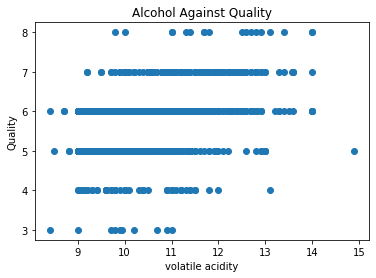

In [19]:
import matplotlib.pylab as plt

plt.scatter(df['alcohol'], df['quality']) # you can try alcohol and volatile acidity
plt.xlabel('volatile acidity')
plt.ylabel('Quality')
plt.title('Alcohol Against Quality')
plt.show()

We see that the <b>alcohol</b> and <b>quality</b> is <b>weak positive</b> relationship; <b>volatial acidity</b> and <b>quality</b> is <b>negative relationship</b>.

In [20]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('./winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print('R-squared: %s' % regressor.score(X_test, y_test))

R-squared: 0.3579337031991636


In [21]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

df = pd.read_csv('./winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print(scores.mean())
print(scores)

0.2900416288421963
[0.13200871 0.31858135 0.34955348 0.369145   0.2809196 ]


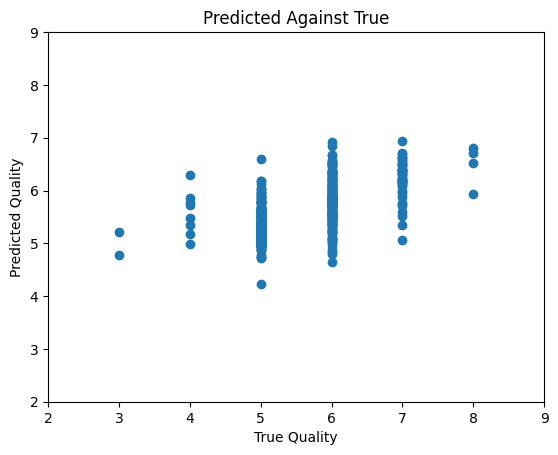

In [22]:
plt.scatter(y_test, y_predictions)
plt.axis([2, 9, 2, 9])
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Against True')
plt.show()

# Gradient escent 梯度下降法

In [23]:
import numpy as np
# from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('./winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

In [24]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.array.reshape(-1, 1)).ravel()
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.array.reshape(-1, 1)).ravel()
regressor = SGDRegressor(loss='squared_error')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print(f'Cross validation r-squared scores: {scores}')
print(f'Average cross validation r-squared score: {np.mean(scores)}')
regressor.fit(X_train, y_train)
print(f'Test set r-squared score {regressor.score(X_test, y_test)}')

Cross validation r-squared scores: [0.284854   0.38804395 0.31292618 0.36407658 0.31988837]
Average cross validation r-squared score: 0.3339578149970879
Test set r-squared score 0.3601845408969644
